In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [69]:
df = pd.read_csv('/content/kidney_disease.csv')
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [70]:
df.shape

(400, 26)

In [71]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [72]:
df.isnull().sum()/len(df)*100

,0
id,0.00
age,2.25
bp,3.00
sg,11.75
al,11.50
su,12.25
rbc,38.00
pc,16.25
pcc,1.00
ba,1.00


In [73]:
df.duplicated().sum()

0

In [74]:
df.columns


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [75]:
#column_to_retain
columns_to_retain= ['age','bp','bgr','bu', 'sc','sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'sg', 'al','htn','classification']
#drop the columns that are not retained
df= df.drop([col for col in df.columns if not col in columns_to_retain],axis=1)
#drop rows with na or with missing values
df.dropna(axis=0)

,age,bp,sg,al,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,classification
3,48.0,70.0,1.005,4.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,ckd
5,60.0,90.0,1.015,3.0,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,ckd
9,53.0,90.0,1.020,2.0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,ckd
11,63.0,70.0,1.010,3.0,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8,yes,ckd
12,68.0,70.0,1.015,3.0,208.0,72.0,2.1,138.0,5.8,9.7,28,12200,3.4,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,notckd
396,42.0,70.0,1.025,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,notckd
397,12.0,80.0,1.020,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,notckd
398,17.0,60.0,1.025,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,notckd


In [76]:
#Transform the non-numerial data in the column
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column]= LabelEncoder().fit_transform(df[column])

In [77]:
df.head(5)

,age,bp,sg,al,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,classification
0,48.0,80.0,1.020,1.0,121.0,36.0,1.2,NaN,NaN,15.4,32,72,34,1,0
1,7.0,50.0,1.020,4.0,NaN,18.0,0.8,NaN,NaN,11.3,26,56,49,0,0
2,62.0,80.0,1.010,2.0,423.0,53.0,1.8,NaN,NaN,9.6,19,70,49,0,0
3,48.0,70.0,1.005,4.0,117.0,56.0,3.8,111.0,2.5,11.2,20,62,19,1,0
4,51.0,80.0,1.010,2.0,106.0,26.0,1.4,NaN,NaN,11.6,23,68,27,0,0


In [78]:
df.tail(5)

,age,bp,sg,al,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,classification
395,55.0,80.0,1.020,0.0,140.0,49.0,0.5,150.0,4.9,15.7,35,62,30,0,2
396,42.0,70.0,1.025,0.0,75.0,31.0,1.2,141.0,3.5,16.5,42,72,44,0,2
397,12.0,80.0,1.020,0.0,100.0,26.0,0.6,137.0,4.4,15.8,37,61,36,0,2
398,17.0,60.0,1.025,0.0,114.0,50.0,1.0,135.0,4.9,14.2,39,67,41,0,2
399,58.0,80.0,1.025,0.0,131.0,18.0,1.1,141.0,3.5,15.8,41,63,43,0,2


<Axes: xlabel='classification', ylabel='count'>

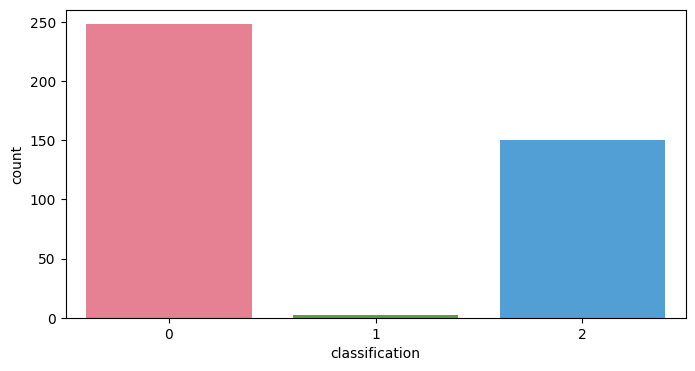

In [79]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,4))
sns.countplot(x='classification',data=df,palette='husl')

In [80]:
X= df.drop(['classification'],axis=1)
Y= df['classification']


In [81]:
X

,age,bp,sg,al,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn
0,48.0,80.0,1.020,1.0,121.0,36.0,1.2,NaN,NaN,15.4,32,72,34,1
1,7.0,50.0,1.020,4.0,NaN,18.0,0.8,NaN,NaN,11.3,26,56,49,0
2,62.0,80.0,1.010,2.0,423.0,53.0,1.8,NaN,NaN,9.6,19,70,49,0
3,48.0,70.0,1.005,4.0,117.0,56.0,3.8,111.0,2.5,11.2,20,62,19,1
4,51.0,80.0,1.010,2.0,106.0,26.0,1.4,NaN,NaN,11.6,23,68,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,140.0,49.0,0.5,150.0,4.9,15.7,35,62,30,0
396,42.0,70.0,1.025,0.0,75.0,31.0,1.2,141.0,3.5,16.5,42,72,44,0
397,12.0,80.0,1.020,0.0,100.0,26.0,0.6,137.0,4.4,15.8,37,61,36,0
398,17.0,60.0,1.025,0.0,114.0,50.0,1.0,135.0,4.9,14.2,39,67,41,0


In [82]:
X.isnull().sum()/len(df)*100

,0
age,2.25
bp,3.00
sg,11.75
al,11.50
bgr,11.00
bu,4.75
sc,4.25
sod,21.75
pot,22.00
hemo,13.00


In [83]:
null_columns = X.columns[X.isnull().any()].tolist()
means = X[null_columns].mean()
X[null_columns] = X[null_columns].fillna(means)

X


,age,bp,sg,al,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn
0,48.0,80.0,1.020,1.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,32,72,34,1
1,7.0,50.0,1.020,4.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,26,56,49,0
2,62.0,80.0,1.010,2.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,19,70,49,0
3,48.0,70.0,1.005,4.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,20,62,19,1
4,51.0,80.0,1.010,2.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,23,68,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,35,62,30,0
396,42.0,70.0,1.025,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,42,72,44,0
397,12.0,80.0,1.020,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,37,61,36,0
398,17.0,60.0,1.025,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,39,67,41,0


In [84]:
Y

,classification
0,0
1,0
2,0
3,0
4,0
...,...
395,2
396,2
397,2
398,2


#Feature Scalling


In [85]:
scaler=MinMaxScaler()
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [86]:
x_test.shape

(80, 14)

In [87]:
x_train.shape

(320, 14)

# Model building

In [88]:

from sklearn.linear_model import LinearRegression as LR
model = LR()
model.fit(x_train,y_train)

LinearRegression()

In [89]:
y_pred = model.predict(x_test)

In [90]:
y_test

,classification
209,0
280,2
33,0
210,0
93,0
...,...
246,0
227,0
369,2
176,0


#Error

In [91]:
from sklearn import metrics
# Mean  Absolute  Error
MAE = metrics.mean_absolute_error(y_test,y_pred)
print('Mean  Absolute  Error',MAE)
# Mean Squared Error
MSE = metrics.mean_squared_error(y_test,y_pred)
print('Mean Squared Error',MSE)
# Root mean square Error
RMSE = np.sqrt(MSE)
print('Root mean square Error',RMSE)
# R2
R2 = metrics.r2_score(y_test,y_pred)
print('R2 Score is',R2)



Mean  Absolute  Error 0.44019517143732145
Mean Squared Error 0.289663396673655
Root mean square Error 0.5382038616301958
R2 Score is 0.6816885750838956


In [92]:
n = len(df)
p = df.shape[1]
Adj_R2 = 1 - ( (1 - R2) * (n - 1) / (n - p - 1))
print('Adjusted_R2',Adj_R2)

Adjusted_R2 0.6692545350481103


#LOGISTIC REGRETION


In [93]:
## Model creation
import seaborn as sns
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression ()
lg.fit(x_train,y_train)

LogisticRegression()

In [94]:
y_pred=lg.predict(x_test)

In [95]:
y_pred

array([2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2])

In [96]:
y_test.values

array([0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2])

## Accuracy checking

In [97]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, ConfusionMatrixDisplay
ACC=accuracy_score(y_test,y_pred)
print(ACC)

0.975


#CONFUSION MATRIX

In [98]:
CM=confusion_matrix(y_test,y_pred) ## diagonal value high----its good
CM

array([[51,  1],
       [ 1, 27]])

<Figure size 800x400 with 0 Axes>

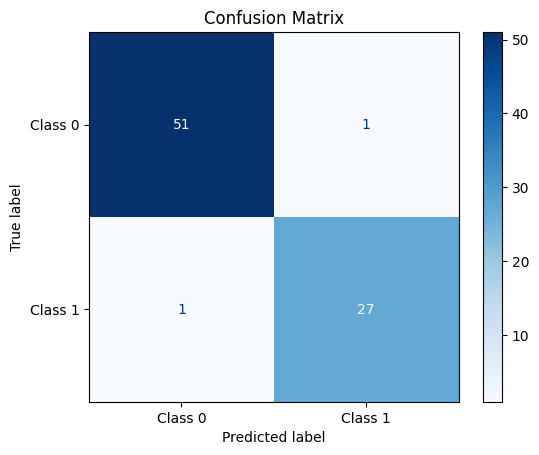

In [99]:
disp =ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=['Class 0', 'Class 1'])
plt.figure(figsize=(8,4))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [100]:
CLS_RPT=classification_report(y_test,y_pred)
print(CLS_RPT)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           2       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [101]:
print("The overall accuracy is: ",ACC*100)

The overall accuracy is:  97.5
